# Práctica 4: Embeddings

* Curso: Data Science para la Gestión de la Información no Estructurada
* Nombre: Mayra Johana Goicochea Neyra
* Máster en Data Science para Finanzas

## Librerías

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

## Data Loading
Se cargan los datos de los archivos `Titulares.txt` y `Etiquetas.txt`. Se convierten en numpy array para que sean manejables para las librerias de nltk y spacy.
Finalmente se crea un dataframe con dos columnas, una de titulares y otra de las etiquetas correspondientes.

In [2]:
corpus = pd.read_csv(r'Titulares.txt',header=None, encoding='utf8')
labels = pd.read_csv(r'Etiquetas.txt',header=None, encoding='utf8')
corpus.columns=['Titular']
labels.columns=['Etiqueta']
corpus = np.array(corpus.Titular)
labels = np.array(labels.Etiqueta)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,¿Qué distancia de seguridad hay que guardar al caminar o correr?,Deportes
1,¿Y si la NBA termina en Disney World?,Deportes
2,El multilateralismo ayudará a superar la crisis generada por el Covid-19,Internacional
3,Acusa a China de usar el virus para intentar boicotear su reelección. La Inteligencia de EEUU reconoce que el Covid-19 no fue creado ni modificado.,Internacional
4,Alberto Contador: “Yo voy a ser Pantani”,Deportes
5,Alemania prohíbe Hizbolá e Israel califica la decisión de «paso valioso»,Internacional
6,Alemania prohíbe todas las actividades de Hezbolá en su territorio,Internacional
7,"António Costa presenta un plan de desescalada en tres fases y apela a la responsabilidad de los ciudadanos: ""El estado de emergencia acabó pero la lucha contra el virus no"".",Internacional
8,Así evoluciona la curva del coronavirus en España,Nacional
9,Así fue la «Operación Libertad» que a punto estuvo de tumbar al chavismo,Internacional


## Preprocesamiento
Consiste en convertir el texto en minusculas, se elimina los caracteres especiales y espacios dobles.
Luego se distribuyen en palabras y se filtran los que estan en la lista de stop-words. Se convierte en un documento. Al final se genera un array de los documentos.

In [3]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('spanish')

def normalize_document(doc):
    # se pasa a minúsculas, se eliminan caracteres especiales y espacios
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenizado
    tokens = wpt.tokenize(doc)
    # filtro de stopwords: sólo se añaden los tokens que no figuran en la lista de stop-words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Y se vuelve a crear el documento doc antes de devolverlo
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [4]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['qu distancia seguridad guardar caminar correr',
       'si nba termina disney world',
       'multilateralismo ayudar superar crisis generada covid',
       'acusa china usar virus intentar boicotear reeleccin inteligencia eeuu reconoce covid creado modificado',
       'alberto contador voy ser pantani',
       'alemania prohbe hizbol israel califica decisin paso valioso',
       'alemania prohbe todas actividades hezbol territorio',
       'antnio costa presenta plan desescalada tres fases apela responsabilidad ciudadanos emergencia acab lucha virus',
       'as evoluciona curva coronavirus espaa',
       'as operacin libertad punto tumbar chavismo',
       'as preparado ftbol francs fin competiciones',
       'bajan muertes mientras crece tensin poltica presin regiones reapertura ms rpida',
       'blgica exceso sinceridad hora contar muertos presin poltica limitada',
       'biden niega acusaciones abuso sexual antigua empleada senado',
       'biden niega supuestos abusos s

# Word Embeddings

## Modelo Embeddings a través de Word2Vec
Para usar Word Embeddings se tiene dos opciones principales:

* Utilizar modelos previamemte entrenados (que estan en linea)

* Entrenar modelos personalizados utilizando los datos y el algoritmo Word2Vec.

En esta oportunidad, dado que se tiene pocos documentos, se entrenará un modelo personalizado. Para ello se considera lo siguientes parametros:

* El Tamaño de vectores es 10 porque son documentos pequeños.

* El tamaño de la `ventana de contexto` es 10.

* Por ser documentos de pocas palabras, se asigna como minimo de cuenta de la palabra a 1.

In [5]:
from gensim.models import word2vec

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

# Ajustamos los valores de los parámetros del entrenamiento

feature_size = 10       # Dimensión de los vectores que constituyen los embeddings  
window_context = 10     # Tamaño de la "Ventana de Contexto", número de palabras "vecinas" que analizamos                                                                       
min_word_count = 1      # Si una palabra aparece menos veces en el corpus, no se utiliza para los embeddings                        
sample = 1e-3           # Las palabras con una frecuencia superior se disminuyen en la muestra

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sample=sample, iter=100)

### Visualización de los embeddings
Los embeddings son vectores de n dimensiones, en este caso 10 (feature_size). Para visualizarlo en dos dimensiones se utiliza la función TSNE, de la libreria sklearn.
La incrustación de vecinos estocásticos distribuidos en t (TSNE) es una técnica no lineal para la reducción de dimensionalidad que es particularmente adecuada para la visualización de conjuntos de datos de alta dimensión.

* Los algoritmos comienzan calculando la probabilidad de similitud de puntos en el espacio de alta dimensión y calculando la probabilidad de similitud de puntos en el espacio de baja dimensión correspondiente. La similitud de puntos se calcula como la probabilidad condicional de que un punto A elija el punto B como vecino si los vecinos se seleccionan en proporción a su densidad de probabilidad bajo un Gaussiano (distribución normal) centrado en A.

* Luego trata de minimizar la diferencia entre estas probabilidades condicionales (o similitudes) en el espacio de dimensiones superiores e inferiores para una representación perfecta de los puntos de datos en el espacio de dimensiones inferiores.

* Para medir la minimización de la suma de la diferencia de probabilidad condicional, t-SNE minimiza la suma de la divergencia de Kullback-Leibler de los puntos de datos generales utilizando un método de descenso de gradiente.

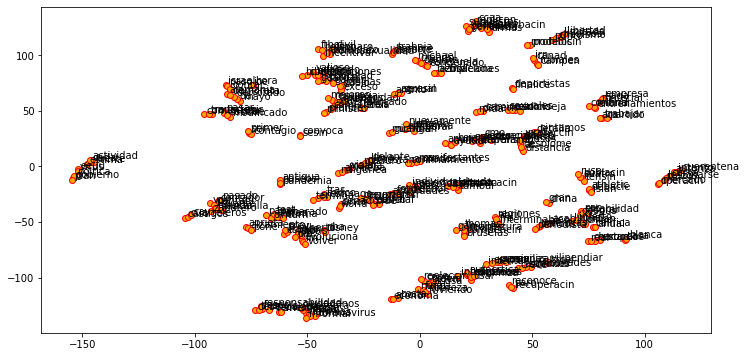

In [6]:
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

El objeto `labels` guarda las palabras reconocidas en el modelo de Word Embeddings.

In [7]:
labels

['gobierno',
 'coronavirus',
 'poltica',
 'eeuu',
 'niega',
 'venezuela',
 'virus',
 'as',
 'biden',
 'crisis',
 'covid',
 'acusa',
 'china',
 'ser',
 'alemania',
 'prohbe',
 'plan',
 'fases',
 'ftbol',
 'competiciones',
 'presin',
 'ms',
 'acusaciones',
 'sexual',
 'empleada',
 'nunca',
 'cuatro',
 'pas',
 'cmo',
 'deporte',
 'competicin',
 'csd',
 'final',
 'copa',
 'qu',
 'distancia',
 'seguridad',
 'guardar',
 'caminar',
 'correr',
 'si',
 'nba',
 'termina',
 'disney',
 'world',
 'multilateralismo',
 'ayudar',
 'superar',
 'generada',
 'usar',
 'intentar',
 'boicotear',
 'reeleccin',
 'inteligencia',
 'reconoce',
 'creado',
 'modificado',
 'alberto',
 'contador',
 'voy',
 'pantani',
 'hizbol',
 'israel',
 'califica',
 'decisin',
 'paso',
 'valioso',
 'todas',
 'actividades',
 'hezbol',
 'territorio',
 'antnio',
 'costa',
 'presenta',
 'desescalada',
 'tres',
 'apela',
 'responsabilidad',
 'ciudadanos',
 'emergencia',
 'acab',
 'lucha',
 'evoluciona',
 'curva',
 'espaa',
 'operacin'

### Embedding de un término
Mediante el modelo, se puede obtener la ubicacion en las 10-Dimensiones. Por ejemplo, la palabra `coronavirus` obtiene los siguientes valores de las 10 dimensiones(parametro del modelo)

In [8]:
w2v_model.wv['coronavirus']

array([-0.05447968,  0.04982695,  0.15335561,  0.12848462,  0.15247357,
        0.7174406 ,  0.1061866 ,  0.04964629, -0.28042635, -0.5056681 ],
      dtype=float32)

## Construcción de un framework de embeddings a nivel de documento
En este apartado, se crea un proceso para determinar los valores de los documentos segun el modelo de Word Embeddings. Consiguiendo al final, un array de 50 filas (50 documentos) * 10 columnas (que son las 10 features identificadas en el modelo).

In [9]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

In [10]:
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [11]:
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


,0,1,2,3,4,5,6,7,8,9
0,-0.035059,-0.012296,0.124507,0.030426,0.086029,0.416919,0.021368,0.015818,-0.157142,-0.254021
1,-0.048864,0.003148,0.112023,0.063979,0.050142,0.344821,0.048205,0.023036,-0.120643,-0.189058
2,-0.030310,-0.015194,0.077531,0.045242,0.059127,0.443379,0.064887,0.010153,-0.157068,-0.318693
3,-0.042910,-0.018480,0.150978,0.077589,0.101229,0.638394,0.047574,0.072225,-0.221997,-0.374548
4,-0.024499,0.062436,0.038049,0.053078,0.063109,0.280729,0.030765,0.049167,-0.122906,-0.218674
5,-0.041826,0.011075,0.143439,0.087570,0.064522,0.501036,0.055787,0.032258,-0.168481,-0.323213
6,-0.021065,0.024167,0.105395,0.031452,0.039657,0.411545,0.043168,-0.017240,-0.138550,-0.231329
7,-0.056781,0.023479,0.175452,0.047276,0.148269,0.751848,0.006668,0.046580,-0.201054,-0.495966
8,-0.034215,0.005202,0.099834,0.076185,0.051367,0.361491,0.028655,0.036322,-0.154323,-0.269892
9,-0.027043,-0.013621,0.122239,0.071866,0.016199,0.359854,0.002925,0.031311,-0.130506,-0.261575


## Clustering con los Word-Embeddings a través del modelo Affinity Propagation
Un método muy importante para el NLP es agrupar los documentos bajo algun modelo de Clustering.
Affinity Propagation o Propagación de afinidad es un método de agrupación que, junto al grupo cualitativo, también determina el número de grupos, k. Los puntos de datos (documentos) pueden verse como una red donde todos los puntos de datos envían mensajes a todos los demás puntos. El objetivo de estos mensajes es la disposición de los puntos a ser ejemplares. Los "ejemplares" son puntos que explican "de mejor manera" los otros puntos de datos y son los más significativos de su grupo. Un grupo solo tiene un ejemplar. Todos los puntos de datos quieren determinar colectivamente qué puntos de datos son "ejemplares". Estos mensajes se almacenan en dos matrices: 
* Matriz de "Responsabilidad", r(i,k) que refleja cuán bien adaptado es el punto k es un ejemplar para el punto i.

* Matriz de "Disponibilidad", a(i,k) que muestra lo apropiado que seria para punto i elegir el punto k como ejemplar.

A continuación, se muestra la agrupación de los documentos mediante este modelo. El algoritmo detecta 5 grupos y se compara con la categoria (etiqueta de los titulares):

In [12]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,¿Qué distancia de seguridad hay que guardar al caminar o correr?,Deportes,3
1,¿Y si la NBA termina en Disney World?,Deportes,0
2,El multilateralismo ayudará a superar la crisis generada por el Covid-19,Internacional,3
3,Acusa a China de usar el virus para intentar boicotear su reelección. La Inteligencia de EEUU reconoce que el Covid-19 no fue creado ni modificado.,Internacional,1
4,Alberto Contador: “Yo voy a ser Pantani”,Deportes,2
5,Alemania prohíbe Hizbolá e Israel califica la decisión de «paso valioso»,Internacional,4
6,Alemania prohíbe todas las actividades de Hezbolá en su territorio,Internacional,0
7,"António Costa presenta un plan de desescalada en tres fases y apela a la responsabilidad de los ciudadanos: ""El estado de emergencia acabó pero la lucha contra el virus no"".",Internacional,1
8,Así evoluciona la curva del coronavirus en España,Nacional,0
9,Así fue la «Operación Libertad» que a punto estuvo de tumbar al chavismo,Internacional,0


Estos clusters se pueden mostrar mediante dos dimensiones con el modelo PCA.

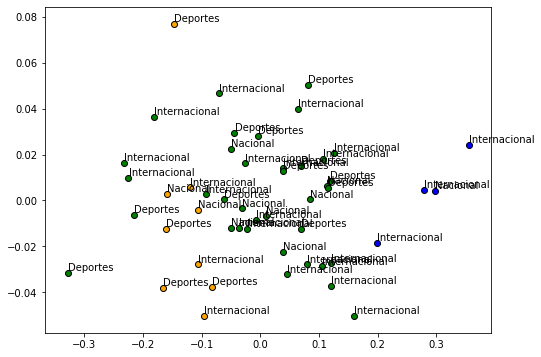

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0), textcoords='offset points')

In [14]:
df = pd.concat([corpus_df, cluster_labels], axis=1)
pd.pivot_table(df,index=["ClusterLabel"],columns=["Category"],values=["Category"],aggfunc=[len], fill_value=0)

len                       
             Document                       
Category     Deportes Internacional Nacional
ClusterLabel                                
0                   4             3        2
1                   0             3        1
2                   2             3        0
3                   2             6        3
4                   7            10        4

## GloVe Embeddings a través de un modelo SpaCy

GloVe es un algoritmo de aprendizaje no supervisado desarrollado por Stanford para generar incrustaciones de palabras agregando una matriz de coincidencia global palabra-palabra a partir de un corpus. Las incrustaciones resultantes muestran interesantes subestructuras lineales de la palabra en el espacio vectorial.

En este apartado, se utiliza el modelo `es_core_news_md` de SpaCy y GloVe Embeddings a nivel de documentos para finalmente agruparlos (clustering):

In [15]:
import spacy

nlp = spacy.load('es_core_news_md')

total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

# Hay que fijarse en que nuestro corpus está en español, por lo tanto tenemos 
# que cargar un modelo en español, y a su vez que incluya vectores, para cargar el modelo de embeddings.
# Esta información se onbtiene de la documentación de los modelos en la página oficial de spaCy

Total word vectors: 20000


Se reconocen 20000 vectores de palabras.

Se aplica Glove Embeddings a las palabras del corpus. A continuación se muestran los valores calculados de las palabras segun cada documento del corpus.

In [16]:
unique_words = list(set([word for sublist in [doc.split() for doc in norm_corpus] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
incentivar,0.659831,-0.820160,1.022111,-1.138605,-0.146501,0.726918,0.386135,0.098298,-0.048230,0.995954,...,0.387555,0.102175,0.411965,1.150716,-0.217637,0.745146,-0.839485,-0.486752,0.052004,0.194126
derrotado,-1.173271,1.007902,0.175639,0.999420,0.652587,-0.401763,-0.347333,0.032305,-0.046825,1.183880,...,-0.756778,0.312477,-1.378718,-0.492206,0.605240,-0.455305,-2.310256,-1.424080,0.090671,-0.859908
gobierno,-0.821895,-0.231377,0.930494,-0.407604,0.761216,-0.399428,0.092649,0.952217,-0.442981,2.598385,...,-0.942287,0.217388,-0.877285,0.880665,-0.239715,0.132721,-1.347495,-2.005469,-0.070916,-0.738727
estmago,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nba,-0.468283,0.439037,-0.402957,-0.256136,-0.101067,0.356889,-0.333343,-0.073106,-0.104728,0.057733,...,-0.218561,-0.061509,0.031013,0.348622,-0.289665,0.258763,0.300017,0.215537,0.167892,0.136130
ftbol,-0.222196,0.241191,-1.216112,-0.866841,-0.896058,-0.257035,-1.261683,-0.526124,-0.237045,0.604227,...,-0.775862,0.779793,1.078680,0.649438,-0.176683,1.060151,0.361360,-0.292295,-0.496214,-1.479535
competiciones,-0.215656,0.232886,-0.668464,0.932741,-0.709535,0.373350,-0.842534,0.014781,-0.971632,1.744937,...,-0.578865,0.267652,0.192209,0.705296,-0.523374,-0.425672,0.496738,-1.815517,0.778569,0.377121
reinicio,-0.149250,-0.607609,1.095263,-1.032736,-0.570005,-0.472963,0.174119,-0.251904,0.053115,0.664083,...,-0.060113,-0.357592,-1.326353,0.337657,0.544608,0.834346,-0.899020,-1.239601,0.777443,0.038020
sesin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ningunea,-0.118335,-1.119419,-0.426850,-0.269820,-0.168257,0.033905,-0.300105,0.206107,-0.245152,1.054553,...,-0.240819,0.391265,0.222969,-0.095857,-0.034344,-0.219101,-0.596070,-0.230710,-0.062815,-0.356431


Como se realizo con el Word2Vec, se usa el TSNE para visualizar los embeddings.

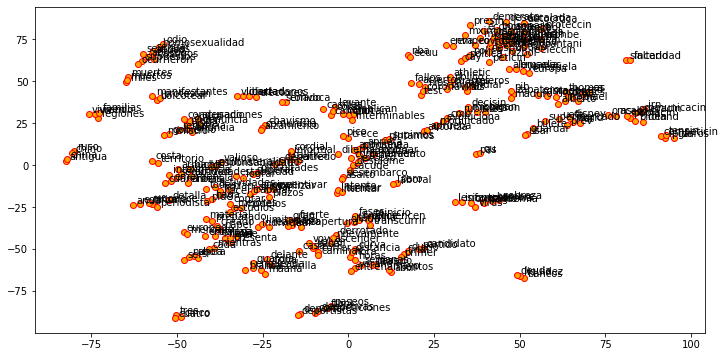

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')
    
# Obsérvese que la distribución de palabras es más coherente que en el caso anterior con Word2Vec
# Sin duda el modelo entrenado con nuestro pequeño corpus
# se comporta peor que un modelo universal entrenado con muchos datos

## Clustering con los Word-Embeddings de GloVe
Mediante los embeddings de GloVe, se realiza el clustering de los documentos:

In [18]:
from sklearn.cluster import KMeans

doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in norm_corpus])

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,¿Qué distancia de seguridad hay que guardar al caminar o correr?,Deportes,1
1,¿Y si la NBA termina en Disney World?,Deportes,2
2,El multilateralismo ayudará a superar la crisis generada por el Covid-19,Internacional,1
3,Acusa a China de usar el virus para intentar boicotear su reelección. La Inteligencia de EEUU reconoce que el Covid-19 no fue creado ni modificado.,Internacional,0
4,Alberto Contador: “Yo voy a ser Pantani”,Deportes,2
5,Alemania prohíbe Hizbolá e Israel califica la decisión de «paso valioso»,Internacional,2
6,Alemania prohíbe todas las actividades de Hezbolá en su territorio,Internacional,1
7,"António Costa presenta un plan de desescalada en tres fases y apela a la responsabilidad de los ciudadanos: ""El estado de emergencia acabó pero la lucha contra el virus no"".",Internacional,1
8,Así evoluciona la curva del coronavirus en España,Nacional,2
9,Así fue la «Operación Libertad» que a punto estuvo de tumbar al chavismo,Internacional,0


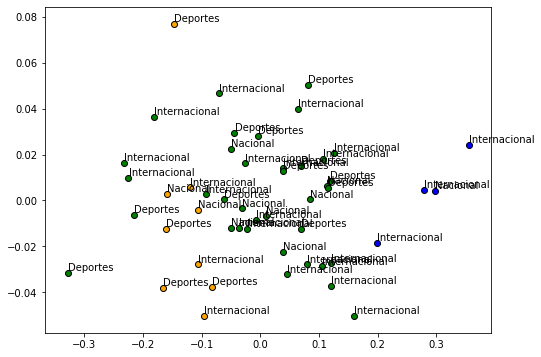

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0), textcoords='offset points')

In [20]:
df = pd.concat([corpus_df, cluster_labels], axis=1)
pd.pivot_table(df,index=["ClusterLabel"],columns=["Category"],values=["Category"],aggfunc=[len], fill_value=0)

len                       
             Document                       
Category     Deportes Internacional Nacional
ClusterLabel                                
0                   0             9        1
1                   4             6        4
2                  11            10        5

## Conclusiones
El clustering mediante el embedding de Glove genera 3 grupos, en contraste con los 5 grupos de Word2Vec, pero parece diferenciar mejor por que el cluster 1 de Word2Vec contiene 3 titulares internacionales y 1 de Nacional, en cambio, el cluster 0 de GloVe contiene 9 titulares Internacional y 1 Nacional.
Los graficos representados con TSNE muestra que el de Word2Vec asociaciones (como aglomeraciones) mas significativas que la de GloVe.
Aunque, el modelo de GloVe es más sencillo de aplicar que el de Word2Vec.
Sería más conveniente revisarlos con un dataset más amplio y comprobar su eficiencia.